In [2]:
import gym
from gym import wrappers
import slimevolleygym
import time

# SlimeVolley-v0

In [5]:
env_wrap = gym.make("SlimeVolley-v0")
env = wrappers.Monitor(env_wrap, './videos/Slime-v1_'
                       + time.strftime ('%Y_%m_%d_%H_%S')
                       +'/', force = True)
observation = env.reset()
t = 0 
while True:
    t+=1
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
env_wrap.close()

Episode finished after 592 timesteps


Basic driver code for an OpenAI gym

In [6]:
env = gym.make("SlimeVolley-v0")
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        #env.render()
        #print(observation)
        action = env.action_space.sample()
        #print(action)
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

In [2]:
import gym
import slimevolleygym

In [7]:
env = gym.make("SlimeVolley-v0")
action = env.action_space.sample()
shape = env.observation_space.shape[0]
print("Action space sample: ",action, "  Observation shape: ",shape)

Action space sample:  [1 1 1]   Observation shape:  12


In [9]:
def my_policy(obs):
    #print(obs)
    return [1,1,1]


env = gym.make("SlimeVolley-v0")

obs = env.reset()
done = False
total_reward = 0

for i_episode in range(20):
#while not done:
  env.render()
  action = my_policy(obs)
  obs, reward, done, info = env.step(action)
  total_reward += reward
  

print("score:", total_reward)

score: 0


In [8]:
#Q - Learning

#Q learning, with temporal diference, does not work since we don't know initial state and actions taken
alpha = 0.05
alpha_decay = 0.1
n_interations = 20000
n_states = env.observation_space.shape[0]
n_actions = 4

s = 0 
possible_actions = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]

Q = np.full((n_states, n_actions), -np.inf)
for state, actions in enumerate(possible_actions):
    Q[state, actions] = 0.0

s = 1
print(np.random.choice(possible_actions))

ValueError: a must be 1-dimensional

###### Findings
The possible_actions must be predefined at every state. So we try, Deep Q-Learning, simulate every state using neural networks. We use [Link to Github](https://github.com/hardmaru/slimevolleygym). Using `SlimeVolleyPixel-v0`

In [24]:
import gym
import slimevolleygym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from matplotlib import pyplot as plt

In [33]:
env = gym.make("SlimeVolley-v0")
obs = env.reset()
obs

array([1.2  , 0.15 , 0.   , 0.   , 0.   , 1.2  , 0.245, 2.484, 1.2  , 0.15 , 0.   , 0.   ])

In [26]:
env.action_space

MultiBinary(3)

In [5]:
env.render()

True

In [6]:
img = env.render(mode="rgb_array")
img.shape

(500, 1200, 3)

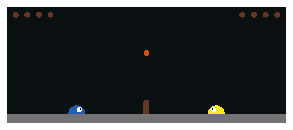

In [6]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")

plt.show()

##### Preprocessing needed for neural network